### GEOG0051

Mining Social and Geographic Datasets
-----------------------------------

Predicting Customer Sentiments Using Unstructured Review Data in Calgary 
-------------------------------

**Note about codes retrieved from other sources**

The some parts of scripts used in this project are adapted from practical sessions of GEOG0115 Module taught at UCL created by Stephen Law, Igor Tkalec, Thomas Keel, and Gong Jie. The other sources will be noted where relevant.

In [2]:
#importing necessary packages for this project

##data managament

import numpy as np #for numeric calculations with more complex data structures
import pandas as pd #for data importing, wrangling and cleaning

##data visualisation

import matplotlib.pyplot as plt #for plots and data visualisation
import seaborn as sns #for plots and data visualisation
import geopandas as gpd #for geospatial data management and mapping
import contextily as ctx #for retrieving basemaps from the internet
import scipy.stats #shapiro-wilk test for normality
from scipy.stats import norm #for normal distribution curve
from wordcloud import WordCloud #for word cloud

##feature engineering

from scipy.stats import skew #check for skewness
from sklearn.preprocessing import StandardScaler #standard scaler of variables

##analysis

from sklearn.model_selection import train_test_split #splitting dataset into train and split before modelling
from sklearn import metrics #metics
from sklearn.metrics import accuracy_score, f1_score #accuracy score and f1 score
from sklearn.model_selection import cross_validate #cross validation
from sklearn.model_selection import GridSearchCV #grid search
from sklearn.model_selection import KFold #kfold
from sklearn.feature_selection import RFE #rfe

##text mining 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer #BOW
from sklearn.decomposition import LatentDirichletAllocation #topic modelling


from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB


##ignore warnings

import warnings
warnings.filterwarnings(action='ignore')

## 1. Data Importing

### 1.1. Online Review Data for Venues in Calgary

The variables contained in the dataset provided in the `Calgary.csv` file, are:

* `business_id`, unique identifier of the premise
* `Name`, name of premise
* `latitude`, `longitude`, i.e. the locational attributes of the venue. <br/>
* `review_count` or the number of reviews the venue has been given<br/>
* `categories` general category of establishment that a venue falls under 
(Note: this variable is rather messy and might needs some cleaning/consolidation to be usable)<br/>
* `hours` or the opening hours of the venue <br/>
* `review_id` unique identifier of the review <br/>
* `user_id` unique identifier of the individual who left the review<br/>
* `stars_y` individual ratings of the venue<br/>
* `useful`, `funny`, `cool`, i.e. tags that the user attached to the review<br/>
* `text`, text of the review <br/>
* `date` i.e. the date of the review<br/>

In [3]:
#importing online reviews for venues in Calgary, Canada

calgary = pd.read_csv("Data/Calgary.csv")
calgary.head()

,business_id,name,latitude,longitude,review_count,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,MbZMmwo-eL0Jnm_Yb9KJrA,Chinook Landscaping and Design,50.94596,-114.037207,3,"Contractors, Landscaping, Home Services","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...",pltqT0DnejbWN-K32BD1Fg,v6zuRbp5jjHroawRiv9IhQ,5.0,1,0,0,David came in the spring to give me an estimat...,2017-08-16 01:10:52
1,MbZMmwo-eL0Jnm_Yb9KJrA,Chinook Landscaping and Design,50.94596,-114.037207,3,"Contractors, Landscaping, Home Services","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...",8Iaf1YXNjo3zPd6-uLSJhg,UkL35C-EXA_yje4HeNINeQ,5.0,0,0,0,Chinook Landscaping is a Company that I would ...,2014-06-15 21:09:06
2,MbZMmwo-eL0Jnm_Yb9KJrA,Chinook Landscaping and Design,50.94596,-114.037207,3,"Contractors, Landscaping, Home Services","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...",fTU0yYLj78NJftEKah-woQ,CXhdG2DP0aplOZPZtNFobw,5.0,0,0,0,Chinook Landscaping is tops in my book\nI was ...,2013-08-22 22:10:38
3,rdg0b0tHKvSCQNl6u3tS_A,SML Entertainment,51.08499,-113.989605,5,"Shopping, Caterers, Furniture Stores, Hot Tub ...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",2SGfqlKDjuFpXZ7LjdNJSQ,siNu6MF02MSMnoyPkaxZyg,5.0,5,0,0,If you are looking for a supplier of games tab...,2009-06-29 02:20:25
4,rdg0b0tHKvSCQNl6u3tS_A,SML Entertainment,51.08499,-113.989605,5,"Shopping, Caterers, Furniture Stores, Hot Tub ...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",5RfnOMsGcQ26EoXlteFOyw,-InhDRRVG7wrwsgAUvN4Qw,5.0,6,3,3,"SML is now a personal wet dream of mine, the e...",2009-12-03 17:29:51


In [4]:
#have a quick look of columns and data types

calgary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82182 entries, 0 to 82181
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   82182 non-null  object 
 1   name          82182 non-null  object 
 2   latitude      82182 non-null  float64
 3   longitude     82182 non-null  float64
 4   review_count  82182 non-null  int64  
 5   categories    82182 non-null  object 
 6   hours         82182 non-null  object 
 7   review_id     82182 non-null  object 
 8   user_id       82182 non-null  object 
 9   stars_y       82182 non-null  float64
 10  useful        82182 non-null  int64  
 11  funny         82182 non-null  int64  
 12  cool          82182 non-null  int64  
 13  text          82182 non-null  object 
 14  date          82182 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 9.4+ MB


### 1.2. Calgary Ward Boundaries

This administrative data is retrieved from https://data.calgary.ca/Government/Ward-Boundaries/tz8z-hyaz

Contains information licensed under the Open Government Licence – City of Calgary.


In [5]:
#importing ward boundaries for Calgary for maps

wards = gpd.read_file("Data/Ward Boundaries/geo_export_39610af6-08cb-426f-b405-56e1cc128d1d.shp")

wards

,councillor,ward_num,label,geometry
0,Sonya Sharp,1.0,WARD 1,"POLYGON ((-114.21111 51.18336, -114.21105 51.1..."
1,Jennifer Wyness,2.0,WARD 2,"POLYGON ((-114.09458 51.19792, -114.09459 51.1..."
2,Jasmine Mian,3.0,WARD 3,"POLYGON ((-114.01329 51.21243, -114.01328 51.2..."
3,Sean Chu,4.0,WARD 4,"POLYGON ((-114.12130 51.13865, -114.12128 51.1..."
4,Raj Dhaliwal,5.0,WARD 5,"POLYGON ((-113.93496 51.18354, -113.92348 51.1..."
5,Richard Pootmans,6.0,WARD 6,"POLYGON ((-114.17593 51.06782, -114.17588 51.0..."
6,Terry Wong,7.0,WARD 7,"POLYGON ((-114.11985 51.08153, -114.11949 51.0..."
7,Courtney Walcott,8.0,WARD 8,"POLYGON ((-114.12295 51.05011, -114.12293 51.0..."
8,Gian-Carlo Carra,9.0,WARD 9,"POLYGON ((-114.03924 51.06700, -114.03351 51.0..."
9,Andre Chabot,10.0,WARD 10,"POLYGON ((-113.91173 51.11064, -113.91174 51.1..."


## 2. Data Wrangling and Exploration

In [6]:
#number of rows and columns in review dataset

calgary.shape

(82182, 15)

### 2.1. Descriptive Statistics of the Dataset

In [7]:
#have a look at descriptive statistics of data

calgary.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,82182.0,51.042724,0.051552,50.865169,51.033200,51.044727,51.066428,51.20754
longitude,82182.0,-114.070648,0.053040,-114.379523,-114.086896,-114.070254,-114.053056,-113.71414
review_count,82182.0,61.995254,77.290191,3.000000,13.000000,36.000000,78.000000,512.00000
stars_y,82182.0,3.618639,1.424214,1.000000,3.000000,4.000000,5.000000,5.00000
useful,82182.0,1.293203,2.830347,0.000000,0.000000,0.000000,2.000000,104.00000
funny,82182.0,0.391083,1.306604,0.000000,0.000000,0.000000,0.000000,59.00000
cool,82182.0,0.382578,1.171075,0.000000,0.000000,0.000000,0.000000,69.00000


### 2.2. Duplicates

In [237]:
#checking duplicates

calgary.duplicated().value_counts()

False    82182
dtype: int64

#### 2.3. Missing Values

In [9]:
#checking missing values

calgary.isnull().value_counts()

business_id  name   latitude  longitude  review_count  categories  hours  review_id  user_id  stars_y  useful  funny  cool   text   date 
False        False  False     False      False         False       False  False      False    False    False   False  False  False  False    82182
dtype: int64

In [10]:
#checking missing values for specific columns

calgary["text"].isnull().value_counts()

False    82182
Name: text, dtype: int64

In [11]:
#checking missing values for specific columns

calgary["useful"].isna().value_counts()


False    82182
Name: useful, dtype: int64

### 2.4. Outliers

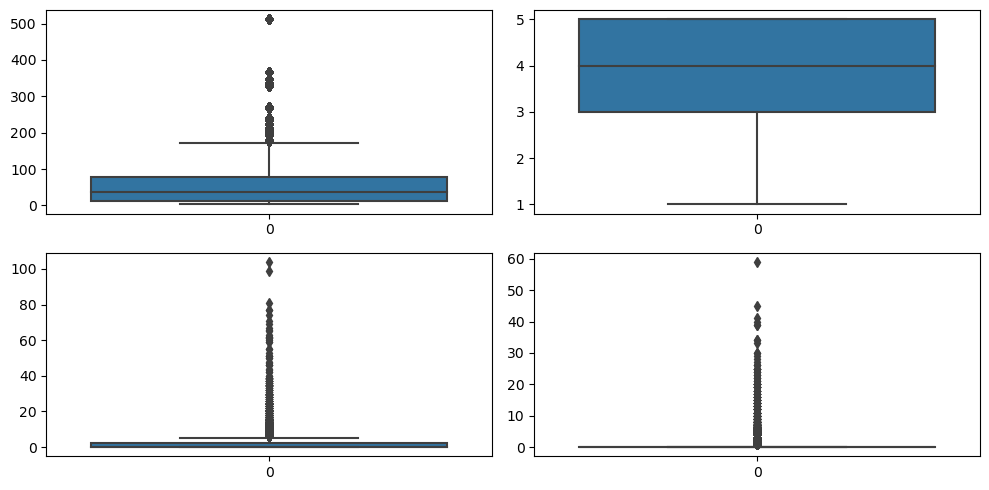

In [12]:
#create box plots of columns to look at outliers of numeric variables 

fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(calgary['review_count'], ax = axs[0,0])
plt2 = sns.boxplot(calgary['stars_y'], ax = axs[0,1])
plt3 = sns.boxplot(calgary['useful'], ax = axs[1,0])
plt4 = sns.boxplot(calgary['funny'], ax = axs[1,1])

plt.tight_layout()

In [242]:
#look at how many venues have more than 200 reviews

(calgary["review_count"] > 200).value_counts()



False    77309
True      4873
Name: review_count, dtype: int64

In [13]:
#calculate review count outliers since some venues have extreme number of reviews compared to others

Q1 = calgary["review_count"].quantile(0.25)
Q3 = calgary["review_count"].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

#calculate outliers using IQR

filter1 = (calgary["review_count"] <= Q1 - 1.5 * IQR) | (calgary["review_count"] >= Q3 + 1.5 *IQR)

#filtering outliers

outliers = calgary[filter1 == True]


#create a df excluding outlierds

calgary_noutliers = calgary[filter1 == False]

calgary_noutliers

,business_id,name,latitude,longitude,review_count,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,MbZMmwo-eL0Jnm_Yb9KJrA,Chinook Landscaping and Design,50.945960,-114.037207,3,"Contractors, Landscaping, Home Services","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...",pltqT0DnejbWN-K32BD1Fg,v6zuRbp5jjHroawRiv9IhQ,5.0,1,0,0,David came in the spring to give me an estimat...,2017-08-16 01:10:52
1,MbZMmwo-eL0Jnm_Yb9KJrA,Chinook Landscaping and Design,50.945960,-114.037207,3,"Contractors, Landscaping, Home Services","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...",8Iaf1YXNjo3zPd6-uLSJhg,UkL35C-EXA_yje4HeNINeQ,5.0,0,0,0,Chinook Landscaping is a Company that I would ...,2014-06-15 21:09:06
2,MbZMmwo-eL0Jnm_Yb9KJrA,Chinook Landscaping and Design,50.945960,-114.037207,3,"Contractors, Landscaping, Home Services","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...",fTU0yYLj78NJftEKah-woQ,CXhdG2DP0aplOZPZtNFobw,5.0,0,0,0,Chinook Landscaping is tops in my book\nI was ...,2013-08-22 22:10:38
3,rdg0b0tHKvSCQNl6u3tS_A,SML Entertainment,51.084990,-113.989605,5,"Shopping, Caterers, Furniture Stores, Hot Tub ...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",2SGfqlKDjuFpXZ7LjdNJSQ,siNu6MF02MSMnoyPkaxZyg,5.0,5,0,0,If you are looking for a supplier of games tab...,2009-06-29 02:20:25
4,rdg0b0tHKvSCQNl6u3tS_A,SML Entertainment,51.084990,-113.989605,5,"Shopping, Caterers, Furniture Stores, Hot Tub ...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",5RfnOMsGcQ26EoXlteFOyw,-InhDRRVG7wrwsgAUvN4Qw,5.0,6,3,3,"SML is now a personal wet dream of mine, the e...",2009-12-03 17:29:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82177,knifdfgaeWZ-277S6lsSnA,Martin's Pest Control,50.905732,-114.066646,3,"Pest Control, Local Services","{'Monday': '0:0-0:0', 'Tuesday': '8:30-16:30',...",pd7i8sxkMfbjdWR926nz8Q,zYLF37lcx2MPIHZVJjahBA,5.0,1,1,0,"I rarely post reviews, but wanted to express h...",2016-08-18 14:19:05
82178,knifdfgaeWZ-277S6lsSnA,Martin's Pest Control,50.905732,-114.066646,3,"Pest Control, Local Services","{'Monday': '0:0-0:0', 'Tuesday': '8:30-16:30',...",Uu4txscaQB25tF5kuG4gkg,rlY-ah6vhTHiRkJMEtDJ-g,5.0,1,0,0,I used Martin's Pest Control for an under-conc...,2015-10-17 23:16:52
82179,Q4-TlHSvl45XMg2Y1wEVJQ,Home-Alyze,51.099332,-114.012717,3,"Home Services, Home Inspectors","{'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...",kooH5UmJ5k-8USDe03jI9Q,Id5k4kNeblkyQSuteVURGQ,1.0,6,0,0,"This company came into my home, 'inspected' th...",2011-09-09 20:22:04
82180,Q4-TlHSvl45XMg2Y1wEVJQ,Home-Alyze,51.099332,-114.012717,3,"Home Services, Home Inspectors","{'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...",2SUoFTckEOdGd1V7GpIvrg,grsdpOuwSdwN3ndafhfa9Q,1.0,3,0,0,I would never recommend them to anyone. I pur...,2013-08-02 07:21:12


In [14]:
#look at how many columns left

calgary_noutliers.shape

(76385, 15)

### 2.5. Deriving filterable columns from 'Categories' column

In [16]:
#creating four columns to have single category since categories column have comma seperated values

calgary_noutliers['cate1'] = calgary_noutliers['categories'].str.split(', ').str[0]
calgary_noutliers['cate2'] = calgary_noutliers['categories'].str.split(', ').str[1]
calgary_noutliers['cate3'] = calgary_noutliers['categories'].str.split(', ').str[2]
calgary_noutliers['cate4'] = calgary_noutliers['categories'].str.split(', ').str[3]


calgary_noutliers.head()

,business_id,name,latitude,longitude,review_count,categories,hours,review_id,user_id,stars_y,...,text,date,column1,column2,column3,column4,cate1,cate2,cate3,cate4
0,MbZMmwo-eL0Jnm_Yb9KJrA,Chinook Landscaping and Design,50.94596,-114.037207,3,"Contractors, Landscaping, Home Services","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...",pltqT0DnejbWN-K32BD1Fg,v6zuRbp5jjHroawRiv9IhQ,5.0,...,David came in the spring to give me an estimat...,2017-08-16 01:10:52,Contractors,Landscaping,Home Services,NaN,Contractors,Landscaping,Home Services,NaN
1,MbZMmwo-eL0Jnm_Yb9KJrA,Chinook Landscaping and Design,50.94596,-114.037207,3,"Contractors, Landscaping, Home Services","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...",8Iaf1YXNjo3zPd6-uLSJhg,UkL35C-EXA_yje4HeNINeQ,5.0,...,Chinook Landscaping is a Company that I would ...,2014-06-15 21:09:06,Contractors,Landscaping,Home Services,NaN,Contractors,Landscaping,Home Services,NaN
2,MbZMmwo-eL0Jnm_Yb9KJrA,Chinook Landscaping and Design,50.94596,-114.037207,3,"Contractors, Landscaping, Home Services","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...",fTU0yYLj78NJftEKah-woQ,CXhdG2DP0aplOZPZtNFobw,5.0,...,Chinook Landscaping is tops in my book\nI was ...,2013-08-22 22:10:38,Contractors,Landscaping,Home Services,NaN,Contractors,Landscaping,Home Services,NaN
3,rdg0b0tHKvSCQNl6u3tS_A,SML Entertainment,51.08499,-113.989605,5,"Shopping, Caterers, Furniture Stores, Hot Tub ...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",2SGfqlKDjuFpXZ7LjdNJSQ,siNu6MF02MSMnoyPkaxZyg,5.0,...,If you are looking for a supplier of games tab...,2009-06-29 02:20:25,Shopping,Caterers,Furniture Stores,Hot Tub & Pool,Shopping,Caterers,Furniture Stores,Hot Tub & Pool
4,rdg0b0tHKvSCQNl6u3tS_A,SML Entertainment,51.08499,-113.989605,5,"Shopping, Caterers, Furniture Stores, Hot Tub ...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",5RfnOMsGcQ26EoXlteFOyw,-InhDRRVG7wrwsgAUvN4Qw,5.0,...,"SML is now a personal wet dream of mine, the e...",2009-12-03 17:29:51,Shopping,Caterers,Furniture Stores,Hot Tub & Pool,Shopping,Caterers,Furniture Stores,Hot Tub & Pool


In [17]:
#look at how many categories the data have

calgary_noutliers["cate1"].value_counts()

Restaurants           12692
Food                   3769
Nightlife              2404
Bars                   2137
Shopping               1694
                      ...  
Pain Management           3
Shaved Ice                3
Threading Services        3
Painters                  3
Radiologists              3
Name: cate1, Length: 510, dtype: int64

In [18]:
#look at how many categories the data have

calgary_noutliers["cate2"].value_counts()

Restaurants                 13330
Food                         4223
Bars                         2154
Nightlife                    2023
Shopping                     1747
                            ...  
Driving Schools                 3
Baby Gear & Furniture           3
Team Building Activities        3
Colombian                       3
Registry Office                 3
Name: cate2, Length: 521, dtype: int64

### 2.6. Deriving year information from date column

In [19]:
#we need only year column

calgary_noutliers['year'] = calgary_noutliers['date'].str[:4]

#grouping by year

calgary_year =calgary_noutliers.groupby(["year"])["stars_y"].agg(["count","mean"]).reset_index()
calgary_year


,year,count,mean
0,2008,330,3.524242
1,2009,1434,3.779637
2,2010,2255,3.815078
3,2011,4071,3.644559
4,2012,5378,3.586277
5,2013,5628,3.446162
6,2014,7069,3.486207
7,2015,9357,3.548253
8,2016,10842,3.582549
9,2017,11081,3.626568


#### 2.6.1. Line graph showing number of reviews each year from 2009 to 2019

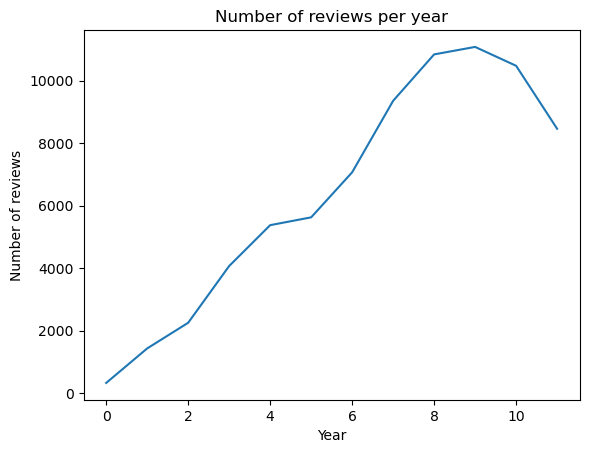

In [20]:
# create a line graph of number of reviews

plt.plot(calgary_year['count'])
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.title('Number of reviews per year')
plt.show()

#### 2.6.2. Filtering data between 2010 and 2019

In [21]:
#leave the data between 2010 and 2019 (ten years)

calgary_noutliers = calgary_noutliers[calgary_noutliers['year'].astype(int) > 2009]

calgary_noutliers


,business_id,name,latitude,longitude,review_count,categories,hours,review_id,user_id,stars_y,...,date,column1,column2,column3,column4,cate1,cate2,cate3,cate4,year
0,MbZMmwo-eL0Jnm_Yb9KJrA,Chinook Landscaping and Design,50.945960,-114.037207,3,"Contractors, Landscaping, Home Services","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...",pltqT0DnejbWN-K32BD1Fg,v6zuRbp5jjHroawRiv9IhQ,5.0,...,2017-08-16 01:10:52,Contractors,Landscaping,Home Services,NaN,Contractors,Landscaping,Home Services,NaN,2017
1,MbZMmwo-eL0Jnm_Yb9KJrA,Chinook Landscaping and Design,50.945960,-114.037207,3,"Contractors, Landscaping, Home Services","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...",8Iaf1YXNjo3zPd6-uLSJhg,UkL35C-EXA_yje4HeNINeQ,5.0,...,2014-06-15 21:09:06,Contractors,Landscaping,Home Services,NaN,Contractors,Landscaping,Home Services,NaN,2014
2,MbZMmwo-eL0Jnm_Yb9KJrA,Chinook Landscaping and Design,50.945960,-114.037207,3,"Contractors, Landscaping, Home Services","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...",fTU0yYLj78NJftEKah-woQ,CXhdG2DP0aplOZPZtNFobw,5.0,...,2013-08-22 22:10:38,Contractors,Landscaping,Home Services,NaN,Contractors,Landscaping,Home Services,NaN,2013
5,rdg0b0tHKvSCQNl6u3tS_A,SML Entertainment,51.084990,-113.989605,5,"Shopping, Caterers, Furniture Stores, Hot Tub ...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",8ypLYaOHH8AXXmyzboBgxw,iqm667X9Jq2hYzRCzFHc8A,1.0,...,2016-11-12 23:48:09,Shopping,Caterers,Furniture Stores,Hot Tub & Pool,Shopping,Caterers,Furniture Stores,Hot Tub & Pool,2016
6,rdg0b0tHKvSCQNl6u3tS_A,SML Entertainment,51.084990,-113.989605,5,"Shopping, Caterers, Furniture Stores, Hot Tub ...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",K_5sg4x1W2mXr5Q3LS8vuw,_wCGl38y-mVddaYpF8LUaA,1.0,...,2014-03-15 20:13:13,Shopping,Caterers,Furniture Stores,Hot Tub & Pool,Shopping,Caterers,Furniture Stores,Hot Tub & Pool,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82177,knifdfgaeWZ-277S6lsSnA,Martin's Pest Control,50.905732,-114.066646,3,"Pest Control, Local Services","{'Monday': '0:0-0:0', 'Tuesday': '8:30-16:30',...",pd7i8sxkMfbjdWR926nz8Q,zYLF37lcx2MPIHZVJjahBA,5.0,...,2016-08-18 14:19:05,Pest Control,Local Services,NaN,NaN,Pest Control,Local Services,NaN,NaN,2016
82178,knifdfgaeWZ-277S6lsSnA,Martin's Pest Control,50.905732,-114.066646,3,"Pest Control, Local Services","{'Monday': '0:0-0:0', 'Tuesday': '8:30-16:30',...",Uu4txscaQB25tF5kuG4gkg,rlY-ah6vhTHiRkJMEtDJ-g,5.0,...,2015-10-17 23:16:52,Pest Control,Local Services,NaN,NaN,Pest Control,Local Services,NaN,NaN,2015
82179,Q4-TlHSvl45XMg2Y1wEVJQ,Home-Alyze,51.099332,-114.012717,3,"Home Services, Home Inspectors","{'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...",kooH5UmJ5k-8USDe03jI9Q,Id5k4kNeblkyQSuteVURGQ,1.0,...,2011-09-09 20:22:04,Home Services,Home Inspectors,NaN,NaN,Home Services,Home Inspectors,NaN,NaN,2011
82180,Q4-TlHSvl45XMg2Y1wEVJQ,Home-Alyze,51.099332,-114.012717,3,"Home Services, Home Inspectors","{'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...",2SUoFTckEOdGd1V7GpIvrg,grsdpOuwSdwN3ndafhfa9Q,1.0,...,2013-08-02 07:21:12,Home Services,Home Inspectors,NaN,NaN,Home Services,Home Inspectors,NaN,NaN,2013


### 2.7. Grouping data by Venues 

In [22]:
#grouping all data by venues using business id

venues =calgary_noutliers.groupby(["business_id","name","cate1","cate2","cate3","cate4","latitude","longitude"])["stars_y"].agg(["count",min,max,"median","mean"]).reset_index()
venues

,business_id,name,cate1,cate2,cate3,cate4,latitude,longitude,count,min,max,median,mean
0,--YPwqIlRJrhHkJcjY3eiA,That Old Retro Store,Vinyl Records,Shopping,Books,Mags,51.041015,-114.033419,3,1.0,4.0,1.0,2.000000
1,-1u4Q4U6OZ-CvqoxUh7gKg,Las Canarias,Tapas Bars,Spanish,Tapas/Small Plates,Restaurants,51.037654,-114.088942,25,1.0,5.0,5.0,4.080000
2,-2C96suwzrE_cqI1U69cLA,Open Sesame,Asian Fusion,Restaurants,Japanese,Nightlife,50.992148,-114.070811,68,1.0,5.0,4.0,3.411765
3,-3k6bAm0_xMD4CYQmH6xHA,Dalhousie Station Foot Clinic,Health & Medical,Medical Centers,Doctors,Podiatrists,51.105195,-114.160208,4,4.0,5.0,5.0,4.750000
4,-6ISxWJBGYyI6JKA71rcPQ,Residential Leasing Group,Property Management,Real Estate Services,Real Estate,Apartments,51.044711,-114.106434,4,1.0,5.0,1.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008,zrBDLK_FVfx3TubDuF-1JQ,Astra Automotive,Auto Repair,Automotive,Transmission Repair,Tires,50.997477,-114.060664,4,4.0,5.0,5.0,4.750000
3009,zv_e5QK1tuWvJTITVM1PXQ,Mahogany Massage & Wellness,Health & Medical,Beauty & Spas,Massage Therapy,Acupuncture,50.932756,-113.968063,5,1.0,5.0,4.0,3.200000
3010,zwFScgZRXOsWnucfwyn8pw,Nottinghams Pub & Restaurant,Pubs,Restaurants,American (Traditional),Burgers,51.116559,-114.204570,22,1.0,5.0,4.0,3.409091
3011,zxT_TuVfr_7OgGdZNyIwyw,Dublin Calling,Pubs,Irish Pub,Chicken Wings,Restaurants,51.038428,-114.141595,5,2.0,3.0,2.0,2.200000


In [23]:
#grouping all data by users using user id

users =calgary_noutliers.groupby(["user_id"])["stars_y"].agg(["count"]).reset_index()
users

,user_id,count
0,--B08Ekk4Y_4KFuF9MWdtw,2
1,--BumyUHiO_7YsHurb9Hkw,2
2,--FMYsAcuHSU-i7wbcYgUw,3
3,--ZrzEOMilg6xl-tg97AQw,2
4,--_H9j6ggxvqhh9nPofZwg,3
...,...,...
23808,zz91qXouZnxazd_YgDPVEw,1
23809,zzHM0ObF2PkZjTFW6jfRZA,5
23810,zzYX1o3qhNlO18QGg3LKdg,1
23811,zzgMuJgxmToqcJ5iu1TngQ,2


### 2.8. Filtering only restaurant reviews

In [24]:
#creating a df consisting of only resturant reviews

restaurants = calgary_noutliers.loc[(calgary_noutliers.cate1=='Restaurants') | (calgary_noutliers.cate2=='Restaurants') | (calgary_noutliers.cate3=='Restaurants') | (calgary_noutliers.cate4=='Restaurants')]

#grouping the data to have each restuarant with average rate

restaurants_group = restaurants.groupby(["business_id","name","cate1","cate2","cate3","cate4","latitude","longitude"])["stars_y"].agg(["count",min,max,"median","mean"]).reset_index()

restaurants_group

,business_id,name,cate1,cate2,cate3,cate4,latitude,longitude,count,min,max,median,mean
0,-1u4Q4U6OZ-CvqoxUh7gKg,Las Canarias,Tapas Bars,Spanish,Tapas/Small Plates,Restaurants,51.037654,-114.088942,25,1.0,5.0,5.0,4.080000
1,-2C96suwzrE_cqI1U69cLA,Open Sesame,Asian Fusion,Restaurants,Japanese,Nightlife,50.992148,-114.070811,68,1.0,5.0,4.0,3.411765
2,-7-uHFjQLH_uxPauYtd8iA,Prego Cucina Italiana,Wine Bars,Bars,Nightlife,Restaurants,51.052572,-114.068347,17,1.0,5.0,4.0,3.647059
3,-HhGpFRmOPxJuzmNTWHqhQ,Sushi2you,Restaurants,Food Court,Sushi Bars,Japanese,51.075125,-113.956028,5,1.0,5.0,5.0,3.400000
4,-Miw03v5yXJWjH9MN1aglw,The Nash,Nightlife,Canadian (New),Restaurants,Bars,51.041415,-114.037001,128,1.0,5.0,4.0,3.906250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,zYs33RJ3-Ply40HQdY9kbw,Oak Tree Tavern,Nightlife,Bars,Restaurants,Pubs,51.052903,-114.085536,40,1.0,5.0,4.0,3.800000
825,z_BS6qapXMX1fA4ZLZ3jCA,Dairy Queen,Ice Cream & Frozen Yogurt,Food,Fast Food,Restaurants,51.013744,-114.132804,4,1.0,2.0,1.0,1.250000
826,z_HWmTH5eR5iEJBfYsPvxg,East Side Mario's,Restaurants,Pizza,American (Traditional),Italian,50.906484,-114.066818,22,1.0,5.0,2.0,2.454545
827,zwFScgZRXOsWnucfwyn8pw,Nottinghams Pub & Restaurant,Pubs,Restaurants,American (Traditional),Burgers,51.116559,-114.204570,22,1.0,5.0,4.0,3.409091


### 2.9. Converting csv data into spatial point data


##### 2.9.1 All reviews into spatial data


In [25]:
#convert df into gdf using lat and long

calgary_gdf = gpd.GeoDataFrame(
    calgary_noutliers, 
    geometry=gpd.points_from_xy(calgary_noutliers.longitude, 
                                      calgary_noutliers.latitude)).set_crs(epsg=4326)


##### 2.9.2. Venues into gdf


In [26]:
#convert df into gdf using lat and long

venue_gdf = gpd.GeoDataFrame(
    venues, 
    geometry=gpd.points_from_xy(venues.longitude, 
                                      venues.latitude)).set_crs(epsg=4326)

##### 2.9.3. Outliers into gdf


In [259]:
#convert df into gdf using lat and long

outliers_gdf  = gpd.GeoDataFrame(
    outliers, 
    geometry=gpd.points_from_xy(outliers.longitude, 
                                      outliers.latitude)).set_crs(epsg=4326)

##### 2.9.4. Restaurant Reviews


In [27]:
#convert restarants into gdf using lat and long

restaurants_gdf = gpd.GeoDataFrame(
    restaurants_group, 
    geometry=gpd.points_from_xy(restaurants_group.longitude, 
                                      restaurants_group.latitude)).set_crs(epsg=4326)
restaurants_gdf


,business_id,name,cate1,cate2,cate3,cate4,latitude,longitude,count,min,max,median,mean,geometry
0,-1u4Q4U6OZ-CvqoxUh7gKg,Las Canarias,Tapas Bars,Spanish,Tapas/Small Plates,Restaurants,51.037654,-114.088942,25,1.0,5.0,5.0,4.080000,POINT (-114.08894 51.03765)
1,-2C96suwzrE_cqI1U69cLA,Open Sesame,Asian Fusion,Restaurants,Japanese,Nightlife,50.992148,-114.070811,68,1.0,5.0,4.0,3.411765,POINT (-114.07081 50.99215)
2,-7-uHFjQLH_uxPauYtd8iA,Prego Cucina Italiana,Wine Bars,Bars,Nightlife,Restaurants,51.052572,-114.068347,17,1.0,5.0,4.0,3.647059,POINT (-114.06835 51.05257)
3,-HhGpFRmOPxJuzmNTWHqhQ,Sushi2you,Restaurants,Food Court,Sushi Bars,Japanese,51.075125,-113.956028,5,1.0,5.0,5.0,3.400000,POINT (-113.95603 51.07512)
4,-Miw03v5yXJWjH9MN1aglw,The Nash,Nightlife,Canadian (New),Restaurants,Bars,51.041415,-114.037001,128,1.0,5.0,4.0,3.906250,POINT (-114.03700 51.04141)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,zYs33RJ3-Ply40HQdY9kbw,Oak Tree Tavern,Nightlife,Bars,Restaurants,Pubs,51.052903,-114.085536,40,1.0,5.0,4.0,3.800000,POINT (-114.08554 51.05290)
825,z_BS6qapXMX1fA4ZLZ3jCA,Dairy Queen,Ice Cream & Frozen Yogurt,Food,Fast Food,Restaurants,51.013744,-114.132804,4,1.0,2.0,1.0,1.250000,POINT (-114.13280 51.01374)
826,z_HWmTH5eR5iEJBfYsPvxg,East Side Mario's,Restaurants,Pizza,American (Traditional),Italian,50.906484,-114.066818,22,1.0,5.0,2.0,2.454545,POINT (-114.06682 50.90648)
827,zwFScgZRXOsWnucfwyn8pw,Nottinghams Pub & Restaurant,Pubs,Restaurants,American (Traditional),Burgers,51.116559,-114.204570,22,1.0,5.0,4.0,3.409091,POINT (-114.20457 51.11656)


### 2.10. Creating dependent variable from customer satisfaction rates


In [28]:
#create the polarity column, where positive is 1 and negative is 0

calgary_gdf["polarity"] = np.where(calgary_gdf['stars_y'] > 3, 1, 0)

#convert string polarity into integer

calgary_gdf["polarity"] = calgary_gdf["polarity"].astype('int')

calgary_gdf

,business_id,name,latitude,longitude,review_count,categories,hours,review_id,user_id,stars_y,...,column2,column3,column4,cate1,cate2,cate3,cate4,year,geometry,polarity
0,MbZMmwo-eL0Jnm_Yb9KJrA,Chinook Landscaping and Design,50.945960,-114.037207,3,"Contractors, Landscaping, Home Services","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...",pltqT0DnejbWN-K32BD1Fg,v6zuRbp5jjHroawRiv9IhQ,5.0,...,Landscaping,Home Services,NaN,Contractors,Landscaping,Home Services,NaN,2017,POINT (-114.03721 50.94596),1
1,MbZMmwo-eL0Jnm_Yb9KJrA,Chinook Landscaping and Design,50.945960,-114.037207,3,"Contractors, Landscaping, Home Services","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...",8Iaf1YXNjo3zPd6-uLSJhg,UkL35C-EXA_yje4HeNINeQ,5.0,...,Landscaping,Home Services,NaN,Contractors,Landscaping,Home Services,NaN,2014,POINT (-114.03721 50.94596),1
2,MbZMmwo-eL0Jnm_Yb9KJrA,Chinook Landscaping and Design,50.945960,-114.037207,3,"Contractors, Landscaping, Home Services","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...",fTU0yYLj78NJftEKah-woQ,CXhdG2DP0aplOZPZtNFobw,5.0,...,Landscaping,Home Services,NaN,Contractors,Landscaping,Home Services,NaN,2013,POINT (-114.03721 50.94596),1
5,rdg0b0tHKvSCQNl6u3tS_A,SML Entertainment,51.084990,-113.989605,5,"Shopping, Caterers, Furniture Stores, Hot Tub ...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",8ypLYaOHH8AXXmyzboBgxw,iqm667X9Jq2hYzRCzFHc8A,1.0,...,Caterers,Furniture Stores,Hot Tub & Pool,Shopping,Caterers,Furniture Stores,Hot Tub & Pool,2016,POINT (-113.98961 51.08499),0
6,rdg0b0tHKvSCQNl6u3tS_A,SML Entertainment,51.084990,-113.989605,5,"Shopping, Caterers, Furniture Stores, Hot Tub ...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",K_5sg4x1W2mXr5Q3LS8vuw,_wCGl38y-mVddaYpF8LUaA,1.0,...,Caterers,Furniture Stores,Hot Tub & Pool,Shopping,Caterers,Furniture Stores,Hot Tub & Pool,2014,POINT (-113.98961 51.08499),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82177,knifdfgaeWZ-277S6lsSnA,Martin's Pest Control,50.905732,-114.066646,3,"Pest Control, Local Services","{'Monday': '0:0-0:0', 'Tuesday': '8:30-16:30',...",pd7i8sxkMfbjdWR926nz8Q,zYLF37lcx2MPIHZVJjahBA,5.0,...,Local Services,NaN,NaN,Pest Control,Local Services,NaN,NaN,2016,POINT (-114.06665 50.90573),1
82178,knifdfgaeWZ-277S6lsSnA,Martin's Pest Control,50.905732,-114.066646,3,"Pest Control, Local Services","{'Monday': '0:0-0:0', 'Tuesday': '8:30-16:30',...",Uu4txscaQB25tF5kuG4gkg,rlY-ah6vhTHiRkJMEtDJ-g,5.0,...,Local Services,NaN,NaN,Pest Control,Local Services,NaN,NaN,2015,POINT (-114.06665 50.90573),1
82179,Q4-TlHSvl45XMg2Y1wEVJQ,Home-Alyze,51.099332,-114.012717,3,"Home Services, Home Inspectors","{'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...",kooH5UmJ5k-8USDe03jI9Q,Id5k4kNeblkyQSuteVURGQ,1.0,...,Home Inspectors,NaN,NaN,Home Services,Home Inspectors,NaN,NaN,2011,POINT (-114.01272 51.09933),0
82180,Q4-TlHSvl45XMg2Y1wEVJQ,Home-Alyze,51.099332,-114.012717,3,"Home Services, Home Inspectors","{'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...",2SUoFTckEOdGd1V7GpIvrg,grsdpOuwSdwN3ndafhfa9Q,1.0,...,Home Inspectors,NaN,NaN,Home Services,Home Inspectors,NaN,NaN,2013,POINT (-114.01272 51.09933),0


In [29]:
#create polarity column with average rates of restaurants

restaurants_gdf["polarity"] = np.where(restaurants_gdf['mean'] > 3, "Positive", "Negative")


restaurants_gdf


,business_id,name,cate1,cate2,cate3,cate4,latitude,longitude,count,min,max,median,mean,geometry,polarity
0,-1u4Q4U6OZ-CvqoxUh7gKg,Las Canarias,Tapas Bars,Spanish,Tapas/Small Plates,Restaurants,51.037654,-114.088942,25,1.0,5.0,5.0,4.080000,POINT (-114.08894 51.03765),Positive
1,-2C96suwzrE_cqI1U69cLA,Open Sesame,Asian Fusion,Restaurants,Japanese,Nightlife,50.992148,-114.070811,68,1.0,5.0,4.0,3.411765,POINT (-114.07081 50.99215),Positive
2,-7-uHFjQLH_uxPauYtd8iA,Prego Cucina Italiana,Wine Bars,Bars,Nightlife,Restaurants,51.052572,-114.068347,17,1.0,5.0,4.0,3.647059,POINT (-114.06835 51.05257),Positive
3,-HhGpFRmOPxJuzmNTWHqhQ,Sushi2you,Restaurants,Food Court,Sushi Bars,Japanese,51.075125,-113.956028,5,1.0,5.0,5.0,3.400000,POINT (-113.95603 51.07512),Positive
4,-Miw03v5yXJWjH9MN1aglw,The Nash,Nightlife,Canadian (New),Restaurants,Bars,51.041415,-114.037001,128,1.0,5.0,4.0,3.906250,POINT (-114.03700 51.04141),Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,zYs33RJ3-Ply40HQdY9kbw,Oak Tree Tavern,Nightlife,Bars,Restaurants,Pubs,51.052903,-114.085536,40,1.0,5.0,4.0,3.800000,POINT (-114.08554 51.05290),Positive
825,z_BS6qapXMX1fA4ZLZ3jCA,Dairy Queen,Ice Cream & Frozen Yogurt,Food,Fast Food,Restaurants,51.013744,-114.132804,4,1.0,2.0,1.0,1.250000,POINT (-114.13280 51.01374),Negative
826,z_HWmTH5eR5iEJBfYsPvxg,East Side Mario's,Restaurants,Pizza,American (Traditional),Italian,50.906484,-114.066818,22,1.0,5.0,2.0,2.454545,POINT (-114.06682 50.90648),Negative
827,zwFScgZRXOsWnucfwyn8pw,Nottinghams Pub & Restaurant,Pubs,Restaurants,American (Traditional),Burgers,51.116559,-114.204570,22,1.0,5.0,4.0,3.409091,POINT (-114.20457 51.11656),Positive


In [30]:
#create polarity column with average rates of all businesess


venue_gdf["polarity"] = np.where(venue_gdf['mean'] > 3, 1, 0)


venue_gdf

,business_id,name,cate1,cate2,cate3,cate4,latitude,longitude,count,min,max,median,mean,geometry,polarity
0,--YPwqIlRJrhHkJcjY3eiA,That Old Retro Store,Vinyl Records,Shopping,Books,Mags,51.041015,-114.033419,3,1.0,4.0,1.0,2.000000,POINT (-114.03342 51.04102),0
1,-1u4Q4U6OZ-CvqoxUh7gKg,Las Canarias,Tapas Bars,Spanish,Tapas/Small Plates,Restaurants,51.037654,-114.088942,25,1.0,5.0,5.0,4.080000,POINT (-114.08894 51.03765),1
2,-2C96suwzrE_cqI1U69cLA,Open Sesame,Asian Fusion,Restaurants,Japanese,Nightlife,50.992148,-114.070811,68,1.0,5.0,4.0,3.411765,POINT (-114.07081 50.99215),1
3,-3k6bAm0_xMD4CYQmH6xHA,Dalhousie Station Foot Clinic,Health & Medical,Medical Centers,Doctors,Podiatrists,51.105195,-114.160208,4,4.0,5.0,5.0,4.750000,POINT (-114.16021 51.10519),1
4,-6ISxWJBGYyI6JKA71rcPQ,Residential Leasing Group,Property Management,Real Estate Services,Real Estate,Apartments,51.044711,-114.106434,4,1.0,5.0,1.0,2.000000,POINT (-114.10643 51.04471),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008,zrBDLK_FVfx3TubDuF-1JQ,Astra Automotive,Auto Repair,Automotive,Transmission Repair,Tires,50.997477,-114.060664,4,4.0,5.0,5.0,4.750000,POINT (-114.06066 50.99748),1
3009,zv_e5QK1tuWvJTITVM1PXQ,Mahogany Massage & Wellness,Health & Medical,Beauty & Spas,Massage Therapy,Acupuncture,50.932756,-113.968063,5,1.0,5.0,4.0,3.200000,POINT (-113.96806 50.93276),1
3010,zwFScgZRXOsWnucfwyn8pw,Nottinghams Pub & Restaurant,Pubs,Restaurants,American (Traditional),Burgers,51.116559,-114.204570,22,1.0,5.0,4.0,3.409091,POINT (-114.20457 51.11656),1
3011,zxT_TuVfr_7OgGdZNyIwyw,Dublin Calling,Pubs,Irish Pub,Chicken Wings,Restaurants,51.038428,-114.141595,5,2.0,3.0,2.0,2.200000,POINT (-114.14159 51.03843),0


In [31]:
#for mapping and visualisation, create string polarity column 

venue_gdf["polarity_str"]= None

venue_gdf["polarity_str"][venue_gdf["polarity"] == 0] = "Negative"

venue_gdf["polarity_str"][venue_gdf["polarity"] == 1] = "Positive"

venue_gdf

,business_id,name,cate1,cate2,cate3,cate4,latitude,longitude,count,min,max,median,mean,geometry,polarity,polarity_str
0,--YPwqIlRJrhHkJcjY3eiA,That Old Retro Store,Vinyl Records,Shopping,Books,Mags,51.041015,-114.033419,3,1.0,4.0,1.0,2.000000,POINT (-114.03342 51.04102),0,Negative
1,-1u4Q4U6OZ-CvqoxUh7gKg,Las Canarias,Tapas Bars,Spanish,Tapas/Small Plates,Restaurants,51.037654,-114.088942,25,1.0,5.0,5.0,4.080000,POINT (-114.08894 51.03765),1,Positive
2,-2C96suwzrE_cqI1U69cLA,Open Sesame,Asian Fusion,Restaurants,Japanese,Nightlife,50.992148,-114.070811,68,1.0,5.0,4.0,3.411765,POINT (-114.07081 50.99215),1,Positive
3,-3k6bAm0_xMD4CYQmH6xHA,Dalhousie Station Foot Clinic,Health & Medical,Medical Centers,Doctors,Podiatrists,51.105195,-114.160208,4,4.0,5.0,5.0,4.750000,POINT (-114.16021 51.10519),1,Positive
4,-6ISxWJBGYyI6JKA71rcPQ,Residential Leasing Group,Property Management,Real Estate Services,Real Estate,Apartments,51.044711,-114.106434,4,1.0,5.0,1.0,2.000000,POINT (-114.10643 51.04471),0,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008,zrBDLK_FVfx3TubDuF-1JQ,Astra Automotive,Auto Repair,Automotive,Transmission Repair,Tires,50.997477,-114.060664,4,4.0,5.0,5.0,4.750000,POINT (-114.06066 50.99748),1,Positive
3009,zv_e5QK1tuWvJTITVM1PXQ,Mahogany Massage & Wellness,Health & Medical,Beauty & Spas,Massage Therapy,Acupuncture,50.932756,-113.968063,5,1.0,5.0,4.0,3.200000,POINT (-113.96806 50.93276),1,Positive
3010,zwFScgZRXOsWnucfwyn8pw,Nottinghams Pub & Restaurant,Pubs,Restaurants,American (Traditional),Burgers,51.116559,-114.204570,22,1.0,5.0,4.0,3.409091,POINT (-114.20457 51.11656),1,Positive
3011,zxT_TuVfr_7OgGdZNyIwyw,Dublin Calling,Pubs,Irish Pub,Chicken Wings,Restaurants,51.038428,-114.141595,5,2.0,3.0,2.0,2.200000,POINT (-114.14159 51.03843),0,Negative


### 3. The Spatial Distribution of Businesses and Restaurants 

#### 3.1. All Businesses

In [36]:
#mapping all businesses with the polarity created with the average rates

fig, ax = plt.subplots(figsize=(15, 15))

ax.set_aspect('equal')

#visualise ward boundry

wards.to_crs(venue_gdf.crs).plot(ax=ax, edgecolor='#537B78',facecolor='none',linestyle='dashed',linewidth=1.6)

#venue points

venue_gdf.plot(ax=ax,marker='o',column="polarity_str",cmap="RdYlBu", markersize=15,legend=True,legend_kwds={'title': 'The Polarity', 'title_fontsize': 20,'fontsize': 19})

#basemap

ctx.add_basemap(ax, crs=venue_gdf.crs, alpha=0.9, source=ctx.providers.CartoDB.Voyager)

#ward labels

for i, row in wards.iterrows():
    ax.annotate(text=row['label'], xy=row['geometry'].centroid.coords[0],  ha='left', fontsize=8,weight='bold',color='white', bbox=dict(facecolor='black', edgecolor='none', alpha=0.4))


#the title
ax.set_title("The Average Sentiments of Venues",fontsize= 24)

#legend posiition

ax.get_legend().set_bbox_to_anchor((0.20, 0.20))


#remove the axis
ax.set_axis_off()

  

#### 3.2. Restaurants

In [38]:
#mapping only restaurants with the polarity created with the average rates

fig, ax = plt.subplots(figsize=(15, 15))

ax.set_aspect('equal')

#visualise ward boundry

wards.to_crs(venue_gdf.crs).plot(ax=ax, edgecolor='#537B78',facecolor='none',linestyle='dashed',linewidth=1.6)

#venue points

restaurants_gdf.plot(ax=ax,marker='o', column= "polarity",cmap="RdYlBu", markersize=15,legend=True, legend_kwds={'title': 'The Polarity', 'title_fontsize': 20,'fontsize': 19})

#basemap

ctx.add_basemap(ax, crs=venue_gdf.crs, alpha=0.9, source=ctx.providers.CartoDB.Voyager)

#ward labels

for i, row in wards.iterrows():
    ax.annotate(text=row['label'], xy=row['geometry'].centroid.coords[0],  ha='left', fontsize=8,weight='bold',color='white', bbox=dict(facecolor='black', edgecolor='none', alpha=0.4))


#the title
ax.set_title("The Average Sentiments of Restaurants",fontsize= 24)

#legend position

ax.get_legend().set_bbox_to_anchor((0.20, 0.20))

#remove the axis

ax.set_axis_off()



#### 3.3. Mapping outleirs to see what we have removed

In [267]:
outliers_gdf["polarity"] = np.where(outliers_gdf['stars_y'] > 3, 1, 0)

#convert string polarity into integer

outliers_gdf["polarity"] = outliers_gdf["polarity"].astype('int')

outliers_gdf

,business_id,name,latitude,longitude,review_count,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date,geometry,polarity
3066,EZ3vflgYwoBAJDrhc0TCbw,Hayden Block Smoke & Whiskey,51.052655,-114.088296,177,"Nightlife, Barbeque, Restaurants, Bars, Whiske...","{'Monday': '11:0-1:0', 'Tuesday': '11:0-1:0', ...",tCIyek7ktmCFQW3TY70sRw,A4bpHuvzaQt9-XAg8e9Msw,4.0,1,0,0,"Oh my dear Brisket, you and I shall be togethe...",2017-02-09 05:57:14,POINT (-114.08830 51.05265),1
3067,EZ3vflgYwoBAJDrhc0TCbw,Hayden Block Smoke & Whiskey,51.052655,-114.088296,177,"Nightlife, Barbeque, Restaurants, Bars, Whiske...","{'Monday': '11:0-1:0', 'Tuesday': '11:0-1:0', ...",Sx6OhaF557RYd3N18OIkzg,brd33PD_6nqK_VVnO3NWAg,5.0,0,0,0,there's nothing bad to say here. I can't even ...,2016-09-06 16:32:18,POINT (-114.08830 51.05265),1
3068,EZ3vflgYwoBAJDrhc0TCbw,Hayden Block Smoke & Whiskey,51.052655,-114.088296,177,"Nightlife, Barbeque, Restaurants, Bars, Whiske...","{'Monday': '11:0-1:0', 'Tuesday': '11:0-1:0', ...",TPaJF3PokYqQN8rG1D_spg,R5Ab6TcorcES3jiQ6BiiDQ,5.0,0,0,0,"Love this place, some of the best BBQ and amaz...",2018-04-04 09:04:46,POINT (-114.08830 51.05265),1
3069,EZ3vflgYwoBAJDrhc0TCbw,Hayden Block Smoke & Whiskey,51.052655,-114.088296,177,"Nightlife, Barbeque, Restaurants, Bars, Whiske...","{'Monday': '11:0-1:0', 'Tuesday': '11:0-1:0', ...",ms9yJpAhYGC-FYFfJ2i2sg,Z5r70En-h8IGz2xWiPxnQg,4.0,0,0,0,I've been here a couple times and I love their...,2017-08-08 20:11:26,POINT (-114.08830 51.05265),1
3070,EZ3vflgYwoBAJDrhc0TCbw,Hayden Block Smoke & Whiskey,51.052655,-114.088296,177,"Nightlife, Barbeque, Restaurants, Bars, Whiske...","{'Monday': '11:0-1:0', 'Tuesday': '11:0-1:0', ...",_djyUVYzJIpH27W6E_0pPw,130UUjfFfVyvAMTN1p2npg,4.0,0,0,0,"Smoked meat and cocktails are always good, but...",2018-09-15 07:14:57,POINT (-114.08830 51.05265),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80769,B9Qt4Eyk3lpz2LEtGU205g,Cactus Club Cafe,51.089517,-114.000813,177,"Canadian (New), Cocktail Bars, Restaurants, Ni...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '...",radJF4C_UGBU1XtkiiF-aQ,ABRH3A37M24GrCR3-bX1Pw,5.0,1,0,1,"Like many others, we came here after a long(is...",2019-06-15 19:31:33,POINT (-114.00081 51.08952),1
80770,B9Qt4Eyk3lpz2LEtGU205g,Cactus Club Cafe,51.089517,-114.000813,177,"Canadian (New), Cocktail Bars, Restaurants, Ni...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '...",z6L7Qk8SMA8jSXEi9WUUZg,Nhzu39a-thKikoYUAGrLbg,5.0,0,0,0,Excellent meal all around! The whole group was...,2019-08-28 11:43:01,POINT (-114.00081 51.08952),1
80771,B9Qt4Eyk3lpz2LEtGU205g,Cactus Club Cafe,51.089517,-114.000813,177,"Canadian (New), Cocktail Bars, Restaurants, Ni...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '...",-IJKiInW57yvx53abs1gCA,77-clznSALDVUdq7TDAhJQ,1.0,1,0,0,"I love CC and always have, but now I'm extreme...",2018-12-21 16:44:14,POINT (-114.00081 51.08952),0
80772,B9Qt4Eyk3lpz2LEtGU205g,Cactus Club Cafe,51.089517,-114.000813,177,"Canadian (New), Cocktail Bars, Restaurants, Ni...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '...",gXlseVDZPrBo58Tl4xeP4g,S8A9AQWmYZfXsyHVTMKXGw,5.0,0,0,0,Great place to eat if you are staying near the...,2019-09-08 21:49:04,POINT (-114.00081 51.08952),1


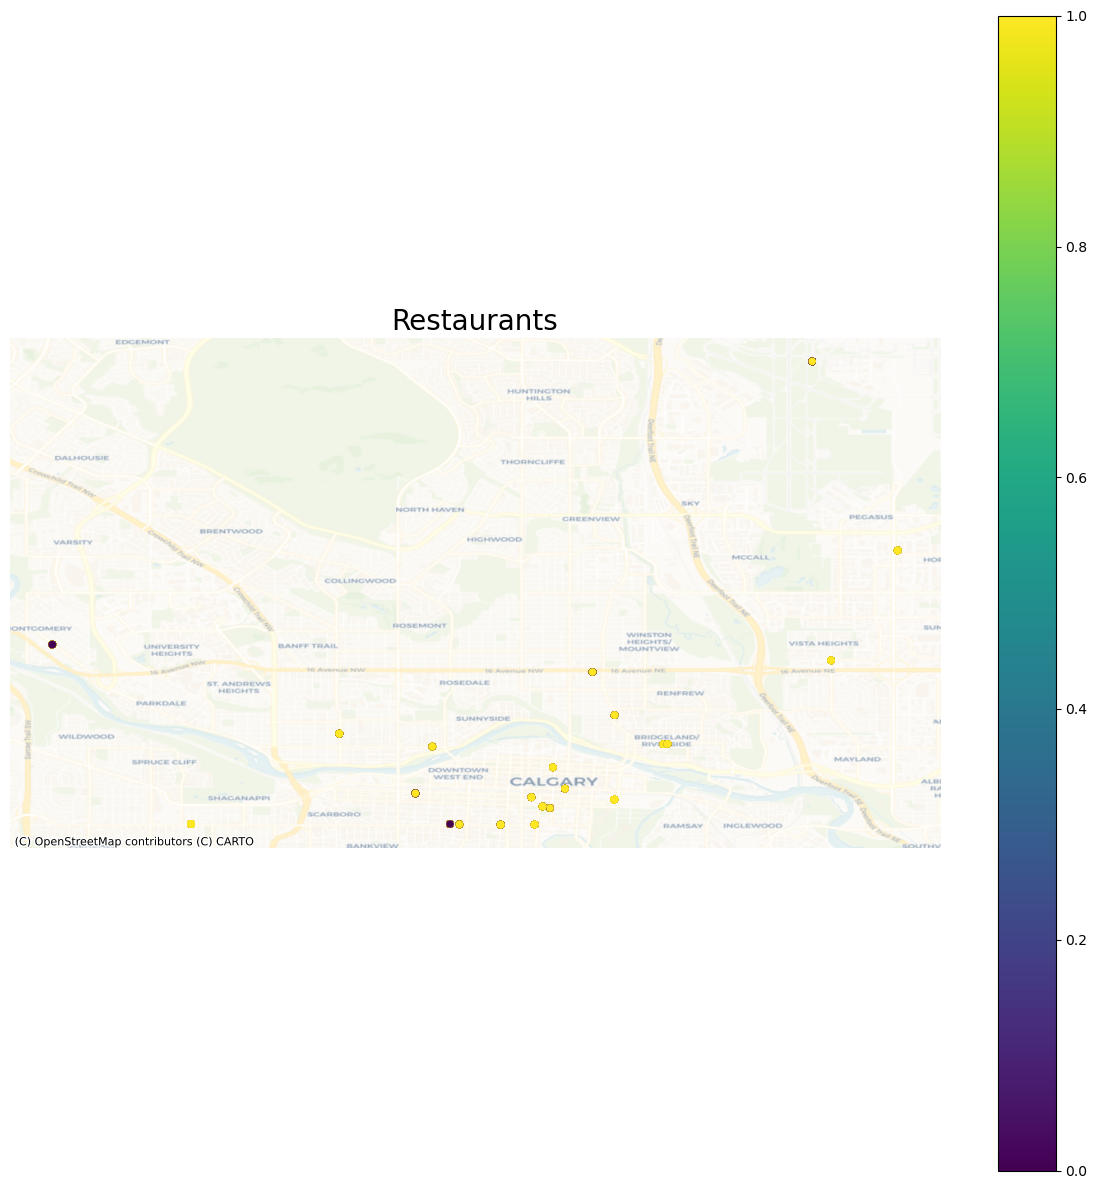

In [114]:
#mapping outliers

fig, ax = plt.subplots(figsize=(15, 15))

ax.set_aspect('equal')

#outlier
outliers_gdf.plot(ax=ax,marker='o', column= "polarity",markersize=20,legend=True)


#basemap
ctx.add_basemap(ax, crs=calgary_gdf.crs, alpha=0.6, source=ctx.providers.CartoDB.Voyager)

#the title
ax.set_title("Outliers",fontsize= 20)

#remove the axis
ax.set_axis_off()

In [270]:
#grouping outlier reviews 

outliers_group =outliers.groupby("business_id")["stars_y"].agg(["count",min,max,"median","mean"]).reset_index()
outliers_group

,business_id,count,min,max,median,mean
0,5aK167zvZhGs_i7Vf4A1NQ,518,1.0,5.0,5.0,4.480695
1,7DjrTaEIa-7x3o-Trp2Htw,217,1.0,5.0,4.0,4.304147
2,8dnH_PcGlzECcCGk_5yyww,202,1.0,5.0,4.0,4.064356
3,9tgJbLfCQcZ35-TSabZOfA,245,1.0,5.0,4.0,4.204082
4,ARH8diyhBtiSgRR4_7oxmg,183,1.0,5.0,4.0,3.590164
5,B9Qt4Eyk3lpz2LEtGU205g,181,1.0,5.0,5.0,4.392265
6,CE7hNKYS6gIMKv6jK429uQ,214,1.0,5.0,4.0,4.228972
7,DqSTQWhRU3WKdIN2b_Nzog,180,1.0,5.0,5.0,4.116667
8,EZ3vflgYwoBAJDrhc0TCbw,178,1.0,5.0,5.0,4.325843
9,GGxnlrfvWy7LFvjN5z_z3w,337,1.0,5.0,4.0,4.089021


In [40]:
#convert customer satisfaction rates into inters

calgary_gdf["stars_y"] = calgary_gdf["stars_y"].astype(int)

### Customer Satisfaction Rate Graph

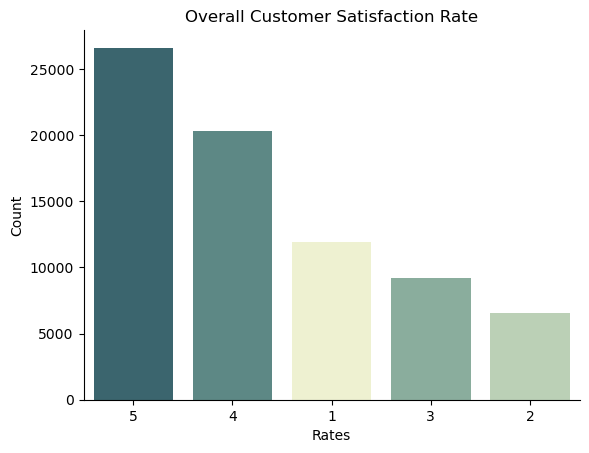

In [41]:
#create a bar chart show 1-5 customer rates distribution

colors = ['#326B77', '#568F8B', '#F3F6CC','#84B39E','#B9D4B2']


#plot

ax = sns.countplot(calgary_gdf,
              x='stars_y',
              palette=colors,
              order=calgary_gdf["stars_y"].value_counts().index)

#title and labels
ax.set(title="Overall Customer Satisfaction Rate", xlabel="Rates", ylabel="Count")

#remove top and right lines

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# Show plot
plt.show()


### Polarity Pie Chart: Positive or Negative

In [42]:
#group data to positive or negative to see how many reviews are there related to each sentiment

calgary_gdf_group= calgary_gdf.groupby("polarity")["business_id"].agg(["count"]).reset_index()

calgary_gdf_group["polarity"] = calgary_gdf_group["polarity"].astype("str")

#create a string polarity column to plot

calgary_gdf_group["polarity"][calgary_gdf_group["polarity"] == "0"] = "Negative"

calgary_gdf_group["polarity"][calgary_gdf_group["polarity"] == "1"] = "Positive"


calgary_gdf_group

,polarity,count
0,Negative,27710
1,Positive,46911


https://www.geeksforgeeks.org/donut-chart-using-matplotlib-in-python/

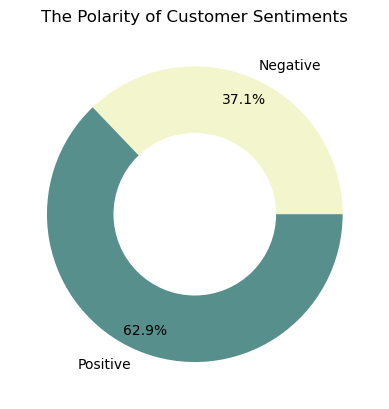

In [43]:
# colors
colors = ['#F3F6CC','#568F8B']

# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
  
# chart
plt.pie(calgary_gdf_group["count"], colors=colors, labels=calgary_gdf_group["polarity"],
        autopct='%1.1f%%', pctdistance=0.85)
  
#donut chart
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
fig = plt.gcf()
  
fig.gca().add_artist(centre_circle)
  
#title

plt.title('The Polarity of Customer Sentiments')

  
#show the chart

plt.show()

### Averate Rates Over Years

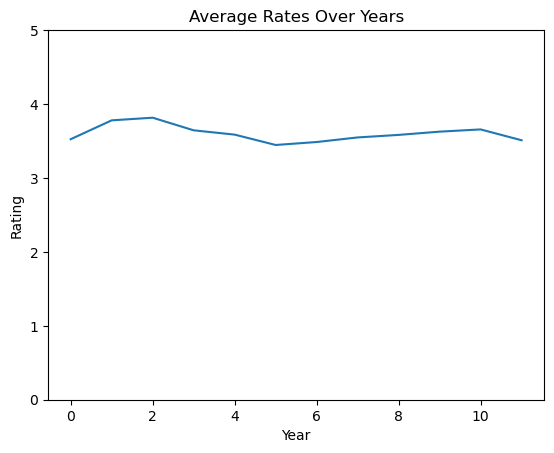

In [45]:
#create a line graph
plt.plot(calgary_year['mean'])
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average Rates Over Years')
plt.ylim(0,5)
plt.show()

### Distribution of Numeric Variables

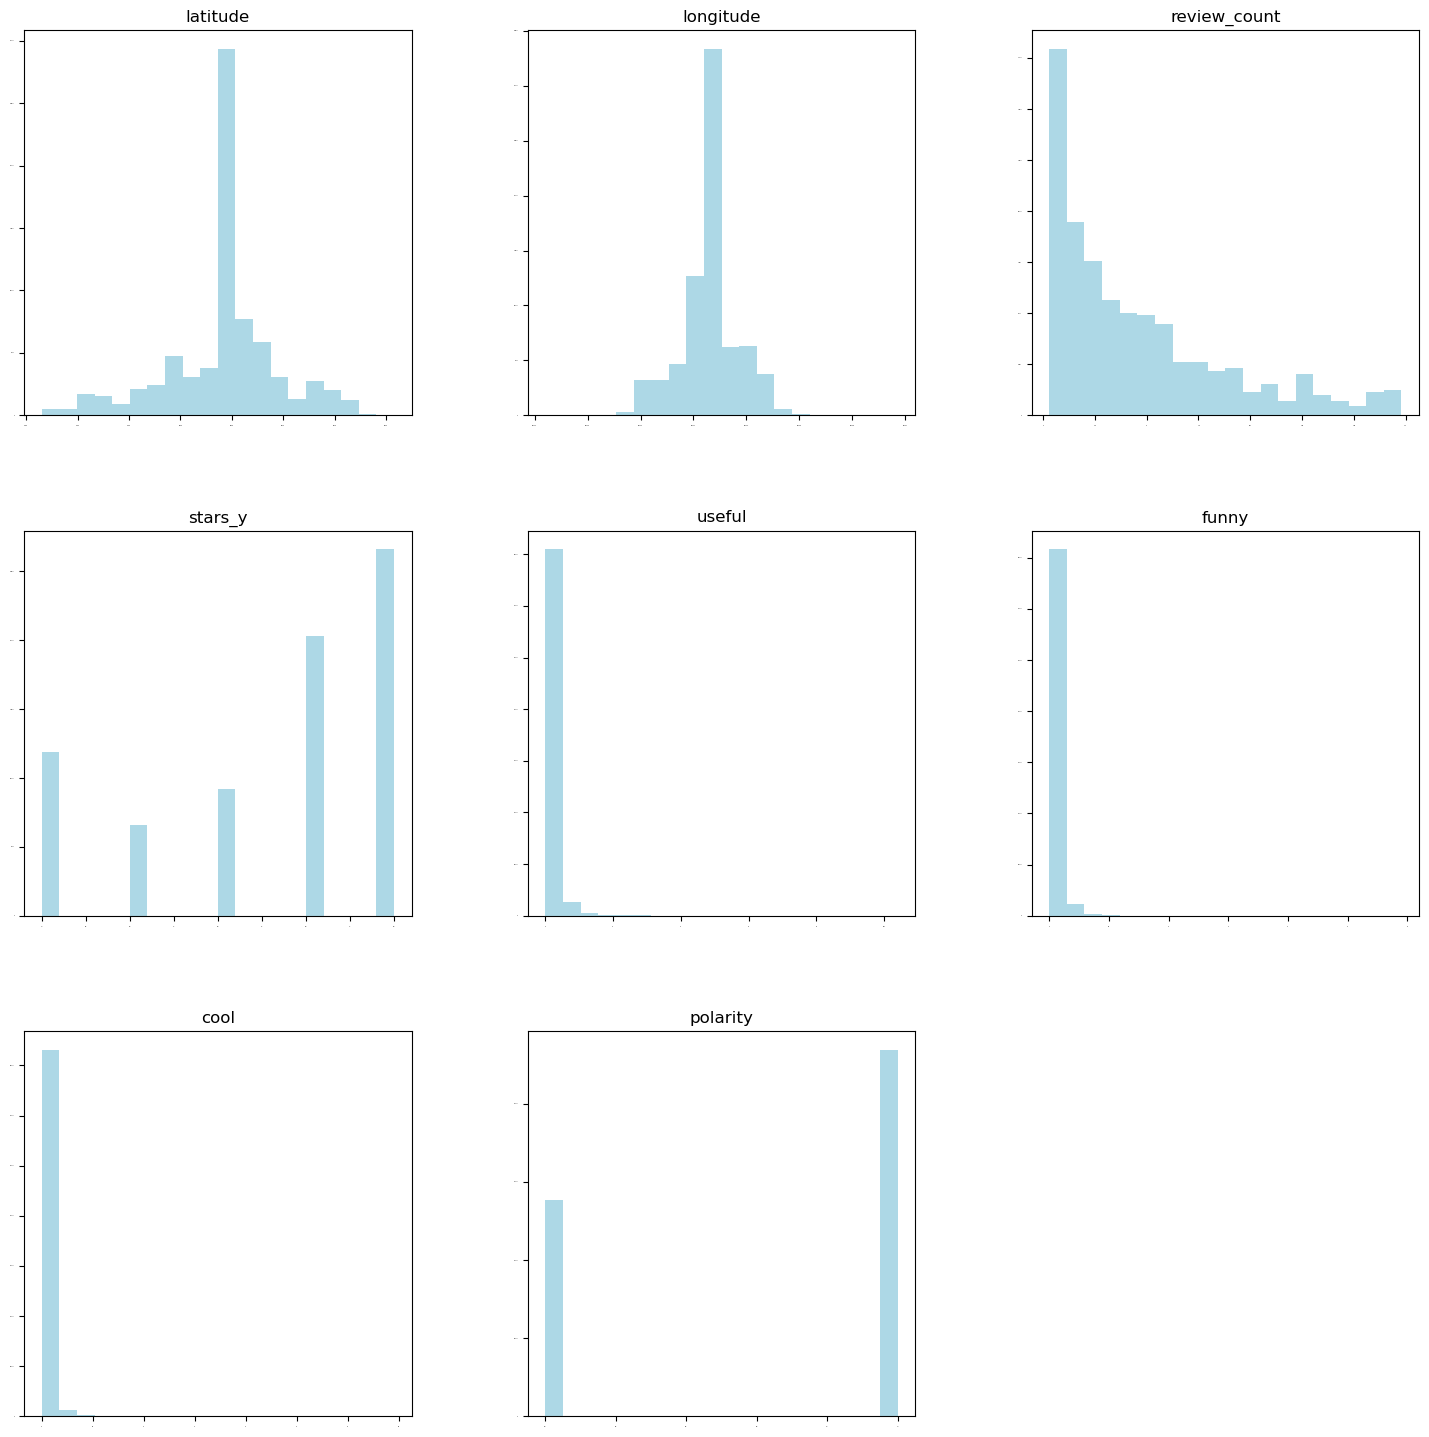

In [46]:
#create histograms for each numeric variable
calgary_gdf.hist(bins=20,
       figsize=(18,18), 
       color='lightblue', 
       xlabelsize=0, 
       ylabelsize=0, 
       grid=False
      )
plt.show()

### 4. Text Mining

#### 4.1 Removing Non-latin Characters, Punctuations, Stop Words from Reviews

The code related to removing non-latin characters is retrieved from 
https://www.analyticsvidhya.com/blog/2022/10/using-text-mining-on-reviews-data-to-generate-business-insights/

In [48]:
import re

#create a function that removes non-latin characters

def remove_non_latin(text):
    """
    Removes non-Latin characters from text using regular expressions.
    """
    latin_only = re.sub(r'[^\x00-\x7F]+', '', text)
    return latin_only

# apply the function to the 'text review' column

calgary_gdf['text_processed'] = calgary_gdf['text'].apply(remove_non_latin)

calgary_gdf

,business_id,name,latitude,longitude,review_count,categories,hours,review_id,user_id,stars_y,...,column3,column4,cate1,cate2,cate3,cate4,year,geometry,polarity,text_processed
0,MbZMmwo-eL0Jnm_Yb9KJrA,Chinook Landscaping and Design,50.945960,-114.037207,3,"Contractors, Landscaping, Home Services","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...",pltqT0DnejbWN-K32BD1Fg,v6zuRbp5jjHroawRiv9IhQ,5,...,Home Services,NaN,Contractors,Landscaping,Home Services,NaN,2017,POINT (-114.03721 50.94596),1,David came in the spring to give me an estimat...
1,MbZMmwo-eL0Jnm_Yb9KJrA,Chinook Landscaping and Design,50.945960,-114.037207,3,"Contractors, Landscaping, Home Services","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...",8Iaf1YXNjo3zPd6-uLSJhg,UkL35C-EXA_yje4HeNINeQ,5,...,Home Services,NaN,Contractors,Landscaping,Home Services,NaN,2014,POINT (-114.03721 50.94596),1,Chinook Landscaping is a Company that I would ...
2,MbZMmwo-eL0Jnm_Yb9KJrA,Chinook Landscaping and Design,50.945960,-114.037207,3,"Contractors, Landscaping, Home Services","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...",fTU0yYLj78NJftEKah-woQ,CXhdG2DP0aplOZPZtNFobw,5,...,Home Services,NaN,Contractors,Landscaping,Home Services,NaN,2013,POINT (-114.03721 50.94596),1,Chinook Landscaping is tops in my book\nI was ...
5,rdg0b0tHKvSCQNl6u3tS_A,SML Entertainment,51.084990,-113.989605,5,"Shopping, Caterers, Furniture Stores, Hot Tub ...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",8ypLYaOHH8AXXmyzboBgxw,iqm667X9Jq2hYzRCzFHc8A,1,...,Furniture Stores,Hot Tub & Pool,Shopping,Caterers,Furniture Stores,Hot Tub & Pool,2016,POINT (-113.98961 51.08499),0,Went in to the south location today to buy a S...
6,rdg0b0tHKvSCQNl6u3tS_A,SML Entertainment,51.084990,-113.989605,5,"Shopping, Caterers, Furniture Stores, Hot Tub ...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",K_5sg4x1W2mXr5Q3LS8vuw,_wCGl38y-mVddaYpF8LUaA,1,...,Furniture Stores,Hot Tub & Pool,Shopping,Caterers,Furniture Stores,Hot Tub & Pool,2014,POINT (-113.98961 51.08499),0,My husband and I were shopping around for a ho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82177,knifdfgaeWZ-277S6lsSnA,Martin's Pest Control,50.905732,-114.066646,3,"Pest Control, Local Services","{'Monday': '0:0-0:0', 'Tuesday': '8:30-16:30',...",pd7i8sxkMfbjdWR926nz8Q,zYLF37lcx2MPIHZVJjahBA,5,...,NaN,NaN,Pest Control,Local Services,NaN,NaN,2016,POINT (-114.06665 50.90573),1,"I rarely post reviews, but wanted to express h..."
82178,knifdfgaeWZ-277S6lsSnA,Martin's Pest Control,50.905732,-114.066646,3,"Pest Control, Local Services","{'Monday': '0:0-0:0', 'Tuesday': '8:30-16:30',...",Uu4txscaQB25tF5kuG4gkg,rlY-ah6vhTHiRkJMEtDJ-g,5,...,NaN,NaN,Pest Control,Local Services,NaN,NaN,2015,POINT (-114.06665 50.90573),1,I used Martin's Pest Control for an under-conc...
82179,Q4-TlHSvl45XMg2Y1wEVJQ,Home-Alyze,51.099332,-114.012717,3,"Home Services, Home Inspectors","{'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...",kooH5UmJ5k-8USDe03jI9Q,Id5k4kNeblkyQSuteVURGQ,1,...,NaN,NaN,Home Services,Home Inspectors,NaN,NaN,2011,POINT (-114.01272 51.09933),0,"This company came into my home, 'inspected' th..."
82180,Q4-TlHSvl45XMg2Y1wEVJQ,Home-Alyze,51.099332,-114.012717,3,"Home Services, Home Inspectors","{'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ...",2SUoFTckEOdGd1V7GpIvrg,grsdpOuwSdwN3ndafhfa9Q,1,...,NaN,NaN,Home Services,Home Inspectors,NaN,NaN,2013,POINT (-114.01272 51.09933),0,I would never recommend them to anyone. I pur...


The code below is retrieved from 
https://stackoverflow.com/questions/57030670/how-to-remove-punctuation-and-numbers-during-tweettokenizer-step-in-nlp


In [49]:
import string
import nltk
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import regexp_tokenize, wordpunct_tokenize, blankline_tokenize


def clean_text(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_doublespace

#apply function to text review column


calgary_gdf['text_processed'] = calgary_gdf['text_processed'].apply(clean_text)

#lemmatization
def preprocessing(text):
    words = word_tokenize(text)
    tokens = [w for w in words if w.lower() not in string.punctuation]
    stopw = stopwords.words('english')
    tokens = [token for token in tokens if token not in stopw]
    tokens = [word for word in tokens if len(word)>=3]
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(word) for word in tokens] 
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

#apply function to text review column

calgary_gdf['text_processed']= calgary_gdf['text_processed'].apply(preprocessing)

#create a df containing only processed text

text_1 = calgary_gdf['text_processed'].values

In [50]:
#look at the processed reviews

calgary_gdf['text_processed']

0        david came spring give estimate redoing centre...
1        chinook landscaping company would recommend ev...
2        chinook landscaping top book extremely pleased...
5        went south location today buy shuffleboard tab...
6        husband shopping around hot tub first stopped ...
                               ...                        
82177    rarely post review wanted express impressed cu...
82178    used martin pest control underconcrete frontst...
82179    company came home inspected place wrote report...
82180    would never recommend anyone purchased home mo...
82181    called book appointment emailed question agree...
Name: text_processed, Length: 74621, dtype: object

In [51]:
text_1.shape

(74621,)

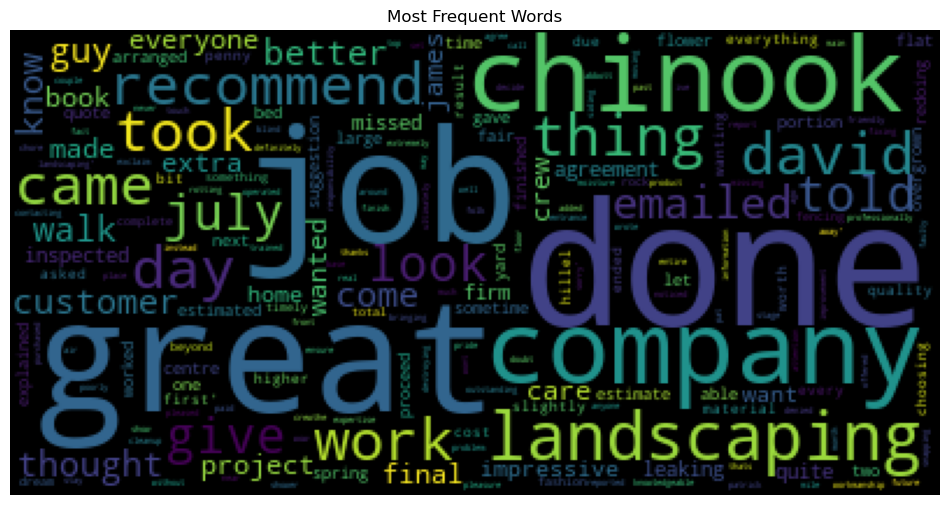

In [52]:
#create a word cloud including all processed words before BOW

wordcloud = WordCloud().generate(str(text_1))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(random_state=2017))
plt.title('Most Frequent Words')
plt.axis("off")
plt.show()

#### 4.2. Frequent Bigrams from Reviews (just for trying)

In [282]:
# find frequent word

tokens = []
for sentence in calgary_gdf['text_processed']:
    tokens.extend(nltk.word_tokenize(sentence))
bigrams = list(nltk.bigrams(tokens))
freq_dist = nltk.FreqDist(bigrams)
freq_bigrams = [bigram for bigram, frequency in freq_dist.most_common(5000)]

# Vectorize training and test data using frequent word pair bigrams as features
vectorizer = CountVectorizer(ngram_range=(2, 2), vocabulary=set(freq_bigrams))


X1 = vectorizer.fit_transform(calgary_gdf['text_processed'])

dff1 = pd.DataFrame(X1.toarray())
dff1

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74619,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [283]:
freq_bigrams

[('customer', 'service'),
 ('first', 'time'),
 ('come', 'back'),
 ('really', 'good'),
 ('highly', 'recommend'),
 ('pretty', 'good'),
 ('ice', 'cream'),
 ('next', 'time'),
 ('food', 'good'),
 ('even', 'though'),
 ('great', 'service'),
 ('great', 'place'),
 ('feel', 'like'),
 ('would', 'recommend'),
 ('staff', 'friendly'),
 ('ive', 'ever'),
 ('dont', 'know'),
 ('every', 'time'),
 ('good', 'food'),
 ('make', 'sure'),
 ('great', 'food'),
 ('service', 'great'),
 ('going', 'back'),
 ('service', 'good'),
 ('food', 'great'),
 ('good', 'service'),
 ('would', 'definitely'),
 ('one', 'best'),
 ('definitely', 'back'),
 ('look', 'like'),
 ('coming', 'back'),
 ('love', 'place'),
 ('friendly', 'staff'),
 ('spring', 'roll'),
 ('long', 'time'),
 ('food', 'service'),
 ('last', 'time'),
 ('ive', 'never'),
 ('right', 'away'),
 ('recommend', 'place'),
 ('year', 'ago'),
 ('much', 'better'),
 ('super', 'friendly'),
 ('dont', 'think'),
 ('parking', 'lot'),
 ('came', 'back'),
 ('quality', 'food'),
 ('fast', 'f

### 4.3. Creating Bag-of-Words

In [53]:
import nltk

# create the vector that contains 1 and 0 for each row

vectorizer = CountVectorizer(analyzer='word',lowercase=True, min_df= 2, stop_words='english',max_features=2500)
vector = vectorizer.fit_transform(calgary_gdf["text_processed"])

#variable with all words

wor = vectorizer.get_feature_names_out()

#create a df exluding the useful, funny and cool tags

withouttag = pd.DataFrame(vector.toarray(),columns=wor)
withouttag

,ability,able,absolute,absolutely,accept,acceptable,access,accessible,accessory,accident,...,youll,young,younger,youre,youve,yum,yummy,yyc,zero,zoo
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74619,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# Concatenate the two dataframes
concatenated_df = calgary_gdf[['useful', 'funny','cool']].reset_index(drop=True)

# Combine numerical features with the relevant columns
X = pd.concat([pd.DataFrame(vector.toarray(),columns=wor),concatenated_df], axis=1)

X

,ability,able,absolute,absolutely,accept,acceptable,access,accessible,accessory,accident,...,youre,youve,yum,yummy,yyc,zero,zoo,useful,funny,cool
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
74617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
74618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,0,0
74619,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0


The below coded is retreived from https://www.geeksforgeeks.org/flipkart-reviews-sentiment-analysis-using-python/?ref=rp

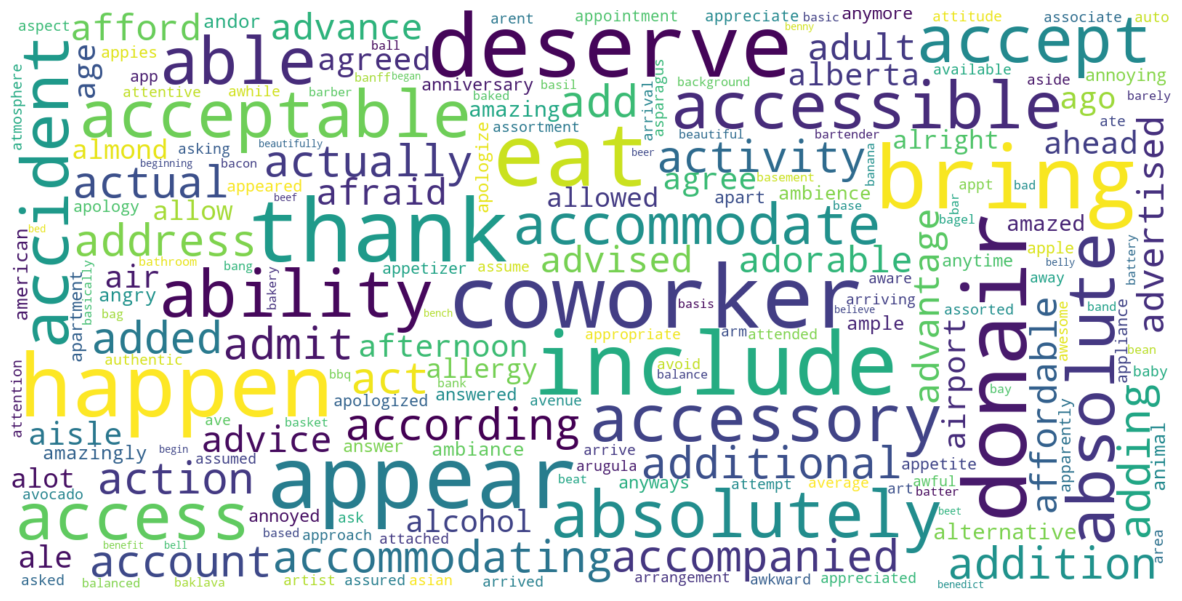

In [55]:
consolidated = ' '.join(
    word for word in wor.astype(str))
wordcloud = WordCloud(width=1600, height=800,
                      random_state=21, max_font_size=120,background_color="white",colormap="viridis")
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()



## 5. Build a supervised learning model for text analysis

### 5.1. Including tags (cool, useful, funny)

#### 5.1. 1 Train the Model

In [56]:
# this gets the training set
X_train, X_test, y_train, y_test = train_test_split(X, calgary_gdf['polarity'],
                                                    test_size=0.2,
                                                    stratify=calgary_gdf['polarity'],
                                                    random_state = 42)
X_train

,ability,able,absolute,absolutely,accept,acceptable,access,accessible,accessory,accident,...,youre,youve,yum,yummy,yyc,zero,zoo,useful,funny,cool
65369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2550,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8353,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
66102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
54628,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 5.1.2. Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier

#fit the model
  
model_dt = DecisionTreeClassifier(random_state=0)
model_dt.fit(X_train,y_train)
  
#testing the model
pred_dt = model_dt.predict(X_test)
print(accuracy_score(y_test,pred_dt))

0.7549078726968175


##### Decision Tree Confusion Matrix

<AxesSubplot: >

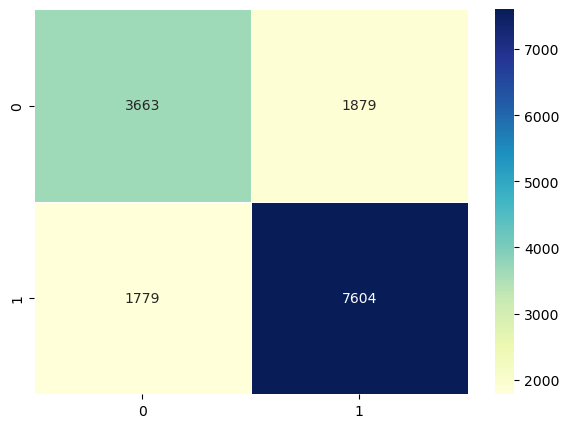

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#creates a grid to plot on

f, ax = plt.subplots(figsize=(7, 5))

#plots confusion matrix

sns.heatmap(confusion_matrix(y_test, pred_dt),annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")

#### 5.1.3. Naive Bayes

In [59]:
# this fit the Naive Bayes Classifier
model_nb = MultinomialNB()
model_nb.fit(X_train,y_train)

# this uses the Naive Bayes Classifier to predict
pred_nb = model_nb.predict(X_test)

# this prints the f1_score 
print (f1_score(y_test, pred_nb, average='macro'))
print (accuracy_score(y_test, pred_nb))

0.8059236801323582
0.8223115577889447


##### Naive Bayes Confusion Matrix

<AxesSubplot: >

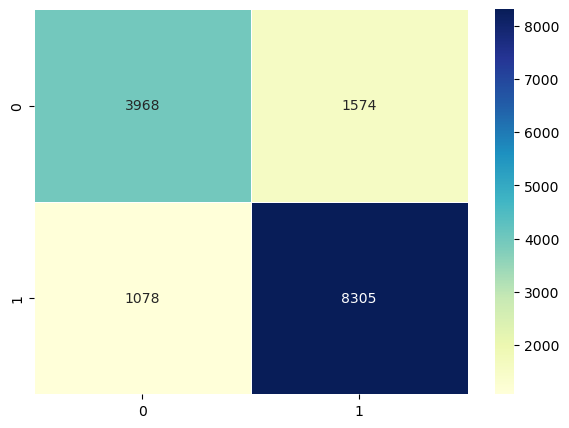

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#creates a grid to plot on

f, ax = plt.subplots(figsize=(7, 5))

#plots confusion matrix

sns.heatmap(confusion_matrix(y_test, pred_nb),annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")

#### 5.1.4. Random Forest

In [61]:

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [10, 40],
    'n_estimators': [100, 200, 300]
}
# Create a based model
model = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 5 # number of folds for cross validation
                           , n_jobs = -1 # use all processors
                            , verbose = 2 # what to display
                          )

In [62]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .....................max_depth=10, n_estimators=200; total time= 1.2min
[CV] END .....................max_depth=40, n_estimators=100; total time= 2.9min
[CV] END .....................max_depth=10, n_estimators=200; total time= 1.2min
[CV] END .....................max_depth=40, n_estimators=100; total time= 2.9min
[CV] END .....................max_depth=10, n_estimators=200; total time= 1.2min
[CV] END .....................max_depth=40, n_estimators=200; total time= 5.2min
[CV] END .....................max_depth=10, n_estimators=200; total time= 1.2min
[CV] END .....................max_depth=40, n_estimators=200; total time= 5.3min
[CV] END .....................max_depth=10, n_estimators=300; total time= 1.6min
[CV] END .....................max_depth=40, n_estimators=200; total time= 5.1min


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 40],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

[CV] END .....................max_depth=10, n_estimators=300; total time= 1.6min
[CV] END .....................max_depth=40, n_estimators=200; total time= 5.1min


In [63]:
model = grid_search.best_estimator_
y_pred=model.predict(X_test)
print ('the out of sample test accuracy for a RandomForestClassifier is : '+ str(round(accuracy_score(y_test, y_pred),3)))

the out of sample test accuracy for a RandomForestClassifier is : 0.842
[CV] END .....................max_depth=10, n_estimators=100; total time=  47.2s
[CV] END .....................max_depth=10, n_estimators=300; total time= 1.8min
[CV] END .....................max_depth=40, n_estimators=200; total time= 4.7min


##### Random Forest Confusion Matrix

<AxesSubplot: >

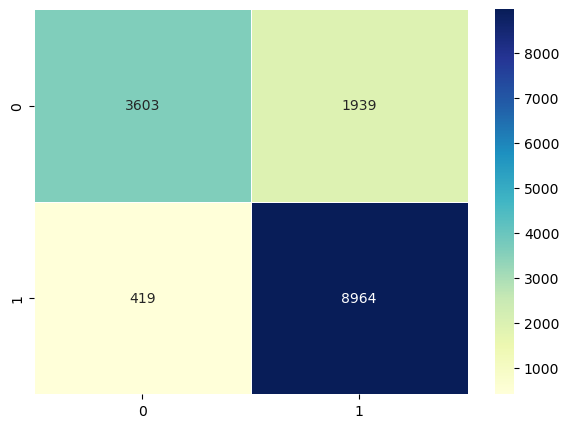

[CV] END .....................max_depth=10, n_estimators=100; total time=  47.3s
[CV] END .....................max_depth=10, n_estimators=300; total time= 1.8min
[CV] END .....................max_depth=40, n_estimators=300; total time= 5.9min
[CV] END .....................max_depth=10, n_estimators=100; total time=  47.3s
[CV] END .....................max_depth=10, n_estimators=300; total time= 1.8min
[CV] END .....................max_depth=40, n_estimators=300; total time= 5.9min
[CV] END .....................max_depth=10, n_estimators=100; total time=  47.5s
[CV] END .....................max_depth=40, n_estimators=100; total time= 2.7min
[CV] END .....................max_depth=40, n_estimators=300; total time= 5.3min
[CV] END .....................max_depth=10, n_estimators=100; total time=  47.6s
[CV] END .....................max_depth=40, n_estimators=100; total time= 2.7min
[CV] END .....................max_depth=40, n_estimators=300; total time= 5.3min
[CV] END ...................

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#creates a grid to plot on

f, ax = plt.subplots(figsize=(7, 5))

#plots confusion matrix

sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")

In [377]:
from sklearn.naive_bayes import GaussianNB


# Train Gaussian Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7512227805695142


### 5.2. Without tags

#### 5.2.1. Train the model

In [349]:
# this gets the training set and vectorise it
X_train, X_test, y_train, y_test = train_test_split(withouttag, calgary_gdf['polarity'],
                                                    test_size=0.2,
                                                    stratify=calgary_gdf['polarity'],
                                                    random_state = 42)
X_train

,ability,able,absolute,absolutely,accept,acceptable,access,accessible,accessory,accident,...,youll,young,younger,youre,youve,yum,yummy,yyc,zero,zoo
65369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2550,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8353,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54628,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 5.2.2. Decision Tree

In [318]:
from sklearn.tree import DecisionTreeClassifier
  
model_dt = DecisionTreeClassifier(random_state=0)
model_dt.fit(X_train,y_train)
  
#testing the model
pred_dt = model_dt.predict(X_test)
print(accuracy_score(y_test,pred_dt))

0.7538358458961474


#### 5.2.3. Naive Bayes

In [340]:
# this fit the Naive Bayes Classifier
model_nb = MultinomialNB()
model_nb.fit(X_train,y_train)

# this uses the Naive Bayes Classifier to predict
pred_nb = model_nb.predict(X_test)

# this prints the f1_score 
print (f1_score(y_test, pred_nb, average='macro'))
print (accuracy_score(y_test, pred_nb))

0.8053713268296081
0.8217755443886097


#### 5.2.4. Random Forest

In [350]:

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10, 40],
    'n_estimators': [100]# restricted the grid search to reduce compute time 
}
# Create a based model
model = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 5 # number of folds for cross validation
                           , n_jobs = -1 # use all processors
                            , verbose = 2 # what to display
                          )

In [351]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 40], 'n_estimators': [100]},
             verbose=2)

[CV] END .....................max_depth=10, n_estimators=100; total time= 3.1min
[CV] END .....................max_depth=10, n_estimators=100; total time= 3.1min
[CV] END .....................max_depth=10, n_estimators=100; total time= 3.1min
[CV] END .....................max_depth=10, n_estimators=100; total time= 3.1min
[CV] END .....................max_depth=10, n_estimators=100; total time= 3.1min
[CV] END .....................max_depth=40, n_estimators=100; total time= 5.4min
[CV] END .....................max_depth=40, n_estimators=100; total time= 5.4min
[CV] END .....................max_depth=40, n_estimators=100; total time= 5.4min
[CV] END .....................max_depth=40, n_estimators=100; total time= 5.4min
[CV] END .....................max_depth=40, n_estimators=100; total time= 5.4min


In [352]:
model = grid_search.best_estimator_
y_pred=model.predict(X_test)
print ('the out of sample test accuracy for a RandomForestClassifier is : '+ str(round(accuracy_score(y_test, y_pred),3)))

the out of sample test accuracy for a RandomForestClassifier is : 0.835


### 6.  Word Embeddings (word2vector)

In [353]:
import gensim
from gensim.models import Word2Vec
import nltk
import numpy as np

import gensim.downloader


#### 6.1. Word2vec pretrained model: Google News 300

The below code is retrived from https://towardsdatascience.com/using-word2vec-to-analyze-news-headlines-and-predict-article-success-cdeda5f14751

In [355]:
from gensim.models import KeyedVectors

import gensim.downloader as api

# Download and load the pre-trained Google word2vec model
model = api.load('word2vec-google-news-300')


In [ ]:
#splitting the processed reviews

text_column = calgary_gdf['text_processed']
text = text_column.apply(lambda x: x.lower().split())


In [356]:
#vectorise the text

X = []
for sentence in calgary_gdf['text_processed']:
    vectors = [model[word] for word in sentence.split() if word in model]
    if vectors:
        X.append(np.mean(vectors, axis=0))
    else:
        X.append(np.zeros(model.vector_size))

In [ ]:
X

In [66]:
#creating array of dependent variable for training

y = pd.factorize(calgary_gdf['polarity'])[0]
y

array([0, 0, 0, ..., 1, 1, 1])

#### 6.2. Train the model

In [360]:
# train the model

split = int(len(X)*0.8)
X3_train, y3_train = X[:split], y[:split]
X3_test, y3_test = X[split:], y[split:]

y3_train

array([0, 0, 0, ..., 1, 0, 1])

#### 6.3. Decision tree

In [361]:
# decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X3_train, y3_train)

# fit the model
y_pred3 = clf.predict(X3_test)

# Calculate accuracy score
accuracy = accuracy_score(y3_test, y_pred3)
print("Accuracy:", accuracy)

Accuracy: 0.7090117252931323


#### 6.4. Random Forest

In [365]:

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10, 40],
    'n_estimators': [100]# restricted the grid search to reduce compute time 
}
# Create a based model
model = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 5 # number of folds for cross validation
                           , n_jobs = -1 # use all processors
                            , verbose = 2 # what to display
                          )

In [366]:
grid_search.fit(X3_train, y3_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 40], 'n_estimators': [100]},
             verbose=2)

In [370]:
model = grid_search.best_estimator_
y3_pred=model.predict(X3_test)
print ('the out of sample test accuracy for a RandomForestClassifier is : '+ str(round(accuracy_score(y3_test, y3_pred),3)))

the out of sample test accuracy for a RandomForestClassifier is : 0.814
[CV] END .....................max_depth=10, n_estimators=100; total time= 1.3min


## 7. Topic Modelling (just for trying)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
def plot_top_words(model, feature_names, n_top_words, title, rows=2, columns=5):
    fig, axes = plt.subplots(rows, columns, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7,color='black')
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

# word n-gram (default)
vectorizer = CountVectorizer(analyzer='word',lowercase=True, min_df=2, stop_words='english')
X2 = vectorizer.fit_transform(calgary_gdf["text_processed"])

wor = vectorizer.get_feature_names_out()


bag_of_words = pd.DataFrame(X2.toarray(),columns=[wor])

X2

In [ ]:
# Run LDA
no_topics=10
lda = LatentDirichletAllocation(no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0).fit(X2)


In [ ]:
# plot top words
no_top_words = 10
plot_top_words(lda, wor, no_top_words, 'Topics in LDA model')